# Naver Webtoon Dataset 분석

## 가설 목록

### naver.csv

1. 가설: 연재 완료 여부(completed)가 웹툰의 평점(rating)에 영향을 줄 것이다.
2. 장르(genre)가 평점(rating)에 영향을 줄 것이다.
3. 연령 제한(age)이 기다리면 무료 여부(free)에 영향을 줄 것이다.

### naver_challange.csv

1. 포텐업 선정 여부(potenup)가 평점(rating)에 영향을 줄 것이다.
2. 장르(genre)가 정식 연재 여부(serialize)에 영향을 줄 것이다.
3. 형식(format)이 정식 연재 여부(serialize)에 영향을 줄 것이다.

### 혼합

1. 베스트 도전 웹툰의 평점(naver_challenge.csv)과 정식 연재 후 평점(naver.csv)이 변화할 것이다.

## 라이브러리 불러오기

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic  
import scipy.stats as spst
from matplotlib import font_manager, rc

# 한글 폰트 설정 (예: 'Malgun Gothic')
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용자의 운영체제에 설치된 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정 (깨지는 현상 방지)
plt.rcParams['axes.unicode_minus'] = False

## 분석 함수 불러오기

### 단변량 분석

In [13]:
# 수치형 변수에 대한 단변량 분석 함수
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (15,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

In [14]:
# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    # 시각화
    plt.figure(figsize = (15,8))
    sns.countplot(x = var, data = data)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

### 이변량 분석

#### target = 수치형

In [17]:
def eda_2_nn(data, feature, target) :
    # 상관분석
    result = spst.pearsonr(data[feature], data[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')

    # 산점도
    temp = data.loc[data[feature].notnull()]
    sns.scatterplot( x= feature, y = target, data = temp)
    plt.grid()
    plt.show()


In [18]:
def eda_2_cn(data, feature, target) :

    # 가설검정
    # 범주의 수 확인
    cat = data[feature].unique()
    n = len(cat)

    # 범주가 2개
    if n == 2 :
        g0 = data.loc[data[feature] == cat[0], target]
        g1 = data.loc[data[feature] == cat[1], target]
        result = spst.ttest_ind(g0, g1)
    else :
        result = spst.f_oneway(*[data.loc[data[feature] == c, target] for c in cat])

    print(result)

    # 시각화 : 평균비교 막대그래프
    plt.figure(figsize = (15,8))
    sns.barplot(x = feature, y = target, data = data)
    plt.grid()
    plt.show()

#### target = 범주형

In [20]:
def eda_2_nc(data, target, var) :

    plt.figure(figsize = (15,7))
    plt.subplot(2,1,1)
    sns.kdeplot(x=var, data = data, hue =target, common_norm=False)
    plt.xlim(data[var].min(), data[var].max())
    plt.grid()

    plt.subplot(2,1,2)
    sns.kdeplot(x=var, data = data, hue =target, multiple='fill')
    plt.axhline(data[target].mean(), color = 'r')
    plt.xlim(data[var].min(), data[var].max())
    plt.grid()

    plt.tight_layout()
    plt.show()

In [21]:
def eda_2_cc(data, target, var) :

    print(data[target].mean())

    temp1 = pd.crosstab(data[target], data[var])
    display(temp1)
    temp2 = pd.crosstab(data[target], data[var], normalize = 'columns')
    display(temp2)

    # plt.figure(figsize = (15,8))
    # mosaic(data, [ var,target], gap = 0.01)
    # plt.axhline(1-data[target].mean(), color = 'r')
    # plt.show()

    fig, ax = plt.subplots(figsize=(15, 8))  # 크기를 설정하고 ax 객체를 생성
    mosaic(data, [var, target], gap=0.01, ax=ax)  # ax 파라미터에 서브플롯 전달
    ax.axhline(1 - data[target].mean(), color='r')
    plt.show()
    
    # 카이제곱검정
    print(spst.chi2_contingency(temp1))

## 데이터 불러오기

In [23]:
naver = pd.read_csv('naver.csv')

In [24]:
naver_c = pd.read_csv('naver_challenge.csv')

## 데이터 확인

### naver.csv

In [27]:
# 데이터 하위 5개 확인
naver.tail()

,id,title,author,genre,description,rating,date,completed,age,free,link
2095,675393,[드라마원작] 한번 더 해요,미티 / 구구,"스토리, 드라마",결혼 8년차 부부. 성대광과 유선영. 대학시절 킹카 퀸카로 CC로 만나 결혼까지 골...,9.91,2018.03.22,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2096,687921,[드라마원작] 아일랜드 2부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 새롭게 돌아온 ...,9.97,2018.02.14,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2097,677536,[드라마원작] 내 ID는 ...,기맹기,"스토리, 로맨스","못생긴 얼굴에서 미인으로 새롭게 태어난 그녀, 강미래! 그런데... 어디서 본 듯 한데?",9.83,2017.12.29,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2098,678500,[드라마원작] 아일랜드 1부,윤인완 / 양경일,"스토리, 스릴러",악귀들이 가득찬 섬 제주도. 이를 물리치는 토막살인범 반. 웹툰으로 돌아온 퇴마만화...,9.96,2016.10.20,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...
2099,67235,[드라마원작] 지금 우리 ...,주동근,"스토리, 스릴러",평범하던 학교에 벌어진 감금사건..그리고 감금사건에 가려 미처 알지 못한 감염자. ...,9.56,2011.11.09,True,18세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...


In [28]:
naver.shape

(2100, 11)

In [29]:
# 데이터 정보 확인
naver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2100 non-null   int64  
 1   title        2100 non-null   object 
 2   author       2100 non-null   object 
 3   genre        2100 non-null   object 
 4   description  2100 non-null   object 
 5   rating       2100 non-null   float64
 6   date         2100 non-null   object 
 7   completed    2100 non-null   bool   
 8   age          1998 non-null   object 
 9   free         2100 non-null   bool   
 10  link         2100 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 151.9+ KB


1. id: 웹툰의 고유 식별자
2. title: 웹툰의 제목
3. author: 웹툰의 작가
4. genre: 웹툰의 장르
5. description: 웹툰의 소개
6. rating: 웹툰의 평균 평점 (10점 만점)
7. date: 웹툰의 가장 최근 업데이트 날짜
8. completed: 완결 여부
9. age: 추천 연령
10. free: "기다리면 무료" 이벤트 가능 여부
11. link: 웹툰의 링크

In [31]:
# age 결측치 확인
naver.loc[naver['age'].isna()]

,id,title,author,genre,description,rating,date,completed,age,free,link
44,786933,갤러리L : 당신의 기억을...,조홍 / 라미아,"스토리, 로맨스",취업 면접에서 번번이 미끄러지는 순진은 자신 때문에 사고를 당해 휠체어 신세가 된 ...,9.27,2022.01.03 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
117,797512,구덩이,철이,"스토리, 액션",[“110억이면 인생 걸만 하잖아?”]마늘밭에 잠들어 있던 욕망의 구덩이가 파헤쳐지...,9.70,2022.07.18 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
125,783538,구원자 요즘 뭐해요,판톰,"스토리, 판타지","마왕이 사라진뒤 몇 년 후, 구원자의 꿈에 다시 마왕이 나타난다. 자신을 구해달라는...",9.68,2021.11.22 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
133,776302,국왕과 성기사의 약탈혼,이린비 / 박지은,"스토리, 로맨스","“그래, 왕이 되었지. 가지고 싶은 건 다 빼앗아 가지려고.”왕위를 찬탈하고 주변국...",9.90,2021.08.23 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
163,801483,그녀는 가면을 쓴다,월해 / 템푸,"스토리, 판타지",카이엔 백작가의 후계자로서 레인저 부대의 부대장으로 살아가던 브릴리아. 그녀는 동생...,9.64,2022.10.24 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=8...
...,...,...,...,...,...,...,...,...,...,...,...
2019,789986,W : 너와 나의 세계,주니버스 / 이채,"스토리, 로맨스",만화가인 아빠의 작품 중에서 강철이 최애캐인 연주는 평범한 일상을 보내던 어느 날 ...,9.77,2022.02.14 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
2020,778737,XXX,투먼,"스토리, 스릴러","괴현상으로 무너지는 세계, 그리고 세 남녀. 정신을 차려보니 어두운 지하실에 묶여...",8.36,2021.09.06 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
2023,799480,100억의 주인,맛기니 / 텅빈,"스토리, 드라마",부모가 남긴 빚을 떠안고 힘겹게 살아가는 유민아. 불어난 빚을 받기 위해 고시원으로...,8.50,2022.08.29 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=7...
2026,802584,10년째 차이는 소꿉친구,님니,"스토리, 로맨스","고백 받고, 차이는 상황이 일상이 된 소꿉친구 율과 시호. 연인으로 발전할 것인가,...",9.86,2022.11.21 10:00,True,NaN,True,https://comic.naver.com/webtoon/list?titleId=8...


In [32]:
naver['age'].isna().sum()

102

In [33]:
print(naver['age'].value_counts())
print(naver['age'].value_counts(normalize=True))

age
전체연령가      868
15세 이용가    578
12세 이용가    486
18세 이용가     66
Name: count, dtype: int64
age
전체연령가      0.434434
15세 이용가    0.289289
12세 이용가    0.243243
18세 이용가    0.033033
Name: proportion, dtype: float64


- 결측치를 채울만한 적절한 근거가 없어서, 장르에 따라 나누는 건 어떤가 생각

In [35]:
# 크게 장르- 대분류, 장르- 소분류로 나눌 수 있을 것 같다.
print(naver['genre'].value_counts())
print(naver['genre'].value_counts(normalize=True))

genre
스토리, 로맨스       522
스토리, 드라마       373
스토리, 판타지       341
스토리, 스릴러       220
스토리, 액션        168
스토리, 개그         69
에피소드, 일상        56
에피소드, 개그        51
스토리, 무협/사극      40
에피소드, 드라마       36
옴니버스, 스릴러       30
옴니버스, 드라마       29
에피소드, 로맨스       20
스토리, 스포츠        20
스토리, 감성         19
옴니버스, 개그        18
옴니버스, 일상        16
옴니버스, 판타지       14
에피소드, 감성        13
에피소드, 스릴러        9
에피소드, 액션         9
스토리, 일상          8
에피소드, 판타지        7
옴니버스, 로맨스        5
에피소드, 무협/사극      2
에피소드, 스포츠        2
옴니버스, 무협/사극      1
옴니버스, 감성         1
옴니버스, 스포츠        1
Name: count, dtype: int64
genre
스토리, 로맨스       0.248571
스토리, 드라마       0.177619
스토리, 판타지       0.162381
스토리, 스릴러       0.104762
스토리, 액션        0.080000
스토리, 개그        0.032857
에피소드, 일상       0.026667
에피소드, 개그       0.024286
스토리, 무협/사극     0.019048
에피소드, 드라마      0.017143
옴니버스, 스릴러      0.014286
옴니버스, 드라마      0.013810
에피소드, 로맨스      0.009524
스토리, 스포츠       0.009524
스토리, 감성        0.009048
옴니버스, 개그       0.008571
옴니버스, 일상       0.007619
옴니버

In [36]:
# 'genre'를 대분류와 소분류로 나누는 코드 (영어 사용)
naver['Major Category'] = naver['genre'].str.split(',').str[0].str.strip() 
naver['Minor Category'] = naver['genre'].str.split(',').str[1].str.strip()

# 'genre' 컬럼 삭제
naver.drop('genre',axis=1, inplace=True)

naver.columns

Index(['id', 'title', 'author', 'description', 'rating', 'date', 'completed',
       'age', 'free', 'link', 'Major Category', 'Minor Category'],
      dtype='object')

In [37]:
naver.head()

,id,title,author,description,rating,date,completed,age,free,link,Major Category,Minor Category
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기!인기작 ...,9.13,2020.10.19 00:00,True,전체연령가,True,https://comic.naver.com/webtoon/list?titleId=7...,스토리,로맨스
1,670144,가담항설,랑또,이번 주인공은 돌이다!돌이지만 동료도 모으고 악당도 물리친다!랑또 작가표 동양 판타...,9.98,2020.10.07 23:00,True,12세 이용가,True,https://comic.naver.com/webtoon/list?titleId=6...,스토리,판타지
2,732071,가령의 정체불명 이야기,가령,어느 날... 인어가 내게 말을 걸어왔다. 눈을 떠보니 총구가 있었다. 그리고 몸이...,9.95,2020.02.03 23:22,True,15세 이용가,True,https://comic.naver.com/webtoon/list?titleId=7...,옴니버스,드라마
3,703844,가비지타임,2사장,"한국 최초 한국형 고교스포츠 웹툰!열혈따윈 개나 줘, 낙오자들 뿐인 농구부의 운명은?",9.96,2022.12.24 22:57,False,전체연령가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,스포츠
4,785701,가상&RPG,주다현,"""사람은 좀 죽여도 싸우는건 싫어해요."" 게임에서조차 집 바깥을 나가지 않는 '제리...",9.91,2022.10.19 23:00,False,12세 이용가,False,https://comic.naver.com/webtoon/list?titleId=7...,스토리,판타지


In [38]:
naver = naver.drop(columns = ['date','description','link'],axis=1)

In [39]:
naver.groupby(['Major Category'], as_index=False)['age'].agg(lambda x: x.mode()[0])

,Major Category,age
0,스토리,전체연령가
1,에피소드,전체연령가
2,옴니버스,전체연령가


In [40]:
naver.groupby(['Minor Category'], as_index=False)['age'].agg(lambda x: x.mode()[0])

,Minor Category,age
0,감성,전체연령가
1,개그,전체연령가
2,드라마,전체연령가
3,로맨스,전체연령가
4,무협/사극,15세 이용가
5,스릴러,15세 이용가
6,스포츠,전체연령가
7,액션,15세 이용가
8,일상,전체연령가
9,판타지,전체연령가


In [41]:
naver.groupby(['Major Category','Minor Category'], as_index=False)['age'].agg(lambda x: x.mode()[0])

,Major Category,Minor Category,age
0,스토리,감성,전체연령가
1,스토리,개그,전체연령가
2,스토리,드라마,전체연령가
3,스토리,로맨스,전체연령가
4,스토리,무협/사극,15세 이용가
5,스토리,스릴러,15세 이용가
6,스토리,스포츠,전체연령가
7,스토리,액션,15세 이용가
8,스토리,일상,전체연령가
9,스토리,판타지,12세 이용가


In [42]:
for (major_category, minor_category), group in naver.groupby(['Major Category', 'Minor Category']):
    if not group['age'].mode().empty:  # 최빈값이 존재하는 경우
        mode_age = group['age'].mode()[0]  # 각 그룹의 최빈값 계산
        naver.loc[(naver['Major Category'] == major_category) & (naver['Minor Category'] == minor_category), 'age'] = group['age'].fillna(mode_age)

In [43]:
print(naver['age'].value_counts())
print(naver['age'].value_counts(normalize=True))

age
전체연령가      932
15세 이용가    600
12세 이용가    502
18세 이용가     66
Name: count, dtype: int64
age
전체연령가      0.443810
15세 이용가    0.285714
12세 이용가    0.239048
18세 이용가    0.031429
Name: proportion, dtype: float64


### naver_challenge.csv

In [45]:
naver_c.tail()

,id,title,author,summary,rating,genre,format,description,serial,potenup,link
3187,577683,GO! 신나고,answ****,꼬꼬마 고독한의 농구를 통한 성장 스토리,9.59,sports,스토리\n\n,열혈 고교 농구 리그가 펼쳐진다!,False,False,https://comic.naver.com/bestChallenge/list?tit...
3188,620971,모두의 추억,rayk****,2002월드컵,9.79,sports,스토리\n\n,2002월드컵! 그날의 감동을 만화로 다시 한번!,False,False,https://comic.naver.com/bestChallenge/list?tit...
3189,571253,튄공,no****,"각기 다른 문제로 제자리에 멈춰버린 네 명의 청춘들, 그들이 만나 길거리 농구대회 ...",9.79,sports,스토리\n\n,"각기 다른 문제로 제자리에 멈춰버린 네 명의 청춘들, 그들이 만나 길거리 농구대회 ...",False,False,https://comic.naver.com/bestChallenge/list?tit...
3190,341379,샌프란시스코 화랑관,uraj****,미국 정통 한국 태권도,9.83,sports,옴니버스,샌프란시스코에 있는 화랑관 태권도장에 있는 유일한 한국인 가야에게 벌어지는 이야기.,True,False,https://comic.naver.com/bestChallenge/list?tit...
3191,443601,GO,kh****,GO,9.70,sports,스토리\n\n,육상을 통한 고등학생들의 이야기!,False,False,https://comic.naver.com/bestChallenge/list?tit...


In [46]:
naver_c.shape

(3192, 11)

In [47]:
# 데이터 정보 확인
naver_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3192 non-null   int64  
 1   title        3192 non-null   object 
 2   author       3192 non-null   object 
 3   summary      3191 non-null   object 
 4   rating       3192 non-null   float64
 5   genre        3192 non-null   object 
 6   format       3192 non-null   object 
 7   description  3192 non-null   object 
 8   serial       3192 non-null   bool   
 9   potenup      3192 non-null   bool   
 10  link         3192 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 230.8+ KB


1. id: 도전 웹툰의 고유 식별자
2. title: 도전 웹툰의 제목
3. author: 도전 웹툰의 작가 (마지막 부분은 블러 처리됨)
4. summary: 도전 웹툰의 간단한 요약
5. rating: 도전 웹툰의 평점
6. genre: 도전 웹툰의 장르
7. format: 도전 웹툰의 형식 (스토리텔링 방식, 예: 스트립, 단편 등)
8. description: 도전 웹툰의 상세 설명
9. serialize: 이 웹툰이 네이버 정식 연재 여부
10. potenup: 포텐업(잠재력 있는 작품으로 선정) 여부

### naver.csv와 차이점
    - author 가 영어 아이디 (병합 시 title이 필요할 듯?)
    - genre가 2개씩 존재하는 경우 존재
    - format이 naver의 Major Category와 동일한 속성

In [50]:
# 장르가 영어고, 심지어 2개인 장르들이 많다
naver_c['genre'].value_counts()

genre
daily, comic               326
fantasy, action            271
daily                      257
drama, pure                223
fantasy, drama             207
fantasy, pure              174
daily, sensibility         145
comic, fantasy             125
fantasy                    119
drama, sensibility         105
daily, drama               105
drama, thrill               88
comic, pure                 73
daily, fantasy              72
pure, sensibility           66
fantasy, thrill             65
drama                       58
comic, drama                53
daily, pure                 51
thrill                      51
pure                        48
comic                       48
fantasy, historical         42
fantasy, sensibility        42
action, thrill              40
action, drama               37
drama, sports               34
comic, sensibility          27
sensibility                 26
drama, historical           24
action                      24
comic, action               22
pu

In [51]:
# genre 나누기
naver_c['genre_1'] = naver_c['genre'].str.split(',').str[0].str.strip() 
naver_c['genre_2'] = naver_c['genre'].str.split(',').str[1].str.strip()

naver_c.columns

Index(['id', 'title', 'author', 'summary', 'rating', 'genre', 'format',
       'description', 'serial', 'potenup', 'link', 'genre_1', 'genre_2'],
      dtype='object')

In [52]:
# naver_c의 Major와 동일 -> 스토리\n\n 수정 필요!
naver_c['format'].value_counts()

format
스토리\n\n    2069
에피소드        852
옴니버스        271
Name: count, dtype: int64

In [53]:
naver_c['format'] = naver_c['format'].replace('스토리\n\n','스토리')

In [54]:
naver_c

,id,title,author,summary,rating,genre,format,description,serial,potenup,link,genre_1,genre_2
0,779637,예수쟁이 다이어리,ahnc****,예수쟁이의 일상,9.30,daily,에피소드,"기독교가 세상에서 제일 싫었던 사람, 어느날 예수쟁이가 되다!\r\n안티 크리스천에...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,NaN
1,748367,이래서 애들은,dksk****,다양한장르의 거짓말,9.89,"daily, comic",옴니버스,하숙집 꼬마를 속이는 하숙생 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
2,748498,나의 섭식장애 일기,vldk****,섭식장애이야기,9.85,daily,에피소드,섭식장애를 겪었던 나의 이야기,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,NaN
3,683018,오늘의 후기,chae****,매일 살아가는 후기,9.77,"daily, comic",에피소드,"여러분은 오늘 무슨 일이 있었나요? 매일을 살아가는 김챈의 그림일기, 오늘의 후기!...",False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,comic
4,756652,제제와 함께,ls****,장애아이와 형제,9.73,"daily, drama",에피소드,출산도 육아도 처음인 초보맘에게 너무나 소중한 첫째 아들이 태어났고..둘째 딸의 출...,False,False,https://comic.naver.com/bestChallenge/list?tit...,daily,drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,577683,GO! 신나고,answ****,꼬꼬마 고독한의 농구를 통한 성장 스토리,9.59,sports,스토리,열혈 고교 농구 리그가 펼쳐진다!,False,False,https://comic.naver.com/bestChallenge/list?tit...,sports,NaN
3188,620971,모두의 추억,rayk****,2002월드컵,9.79,sports,스토리,2002월드컵! 그날의 감동을 만화로 다시 한번!,False,False,https://comic.naver.com/bestChallenge/list?tit...,sports,NaN
3189,571253,튄공,no****,"각기 다른 문제로 제자리에 멈춰버린 네 명의 청춘들, 그들이 만나 길거리 농구대회 ...",9.79,sports,스토리,"각기 다른 문제로 제자리에 멈춰버린 네 명의 청춘들, 그들이 만나 길거리 농구대회 ...",False,False,https://comic.naver.com/bestChallenge/list?tit...,sports,NaN
3190,341379,샌프란시스코 화랑관,uraj****,미국 정통 한국 태권도,9.83,sports,옴니버스,샌프란시스코에 있는 화랑관 태권도장에 있는 유일한 한국인 가야에게 벌어지는 이야기.,True,False,https://comic.naver.com/bestChallenge/list?tit...,sports,NaN


In [55]:
naver_c = naver_c.drop(columns = ['summary','description','link'],axis=1)

## 가설 검증

### naver.csv 가설

,count,mean,std,min,25%,50%,75%,max
rating,2100.0,9.736071,0.559215,3.81,9.77,9.9,9.95,9.99


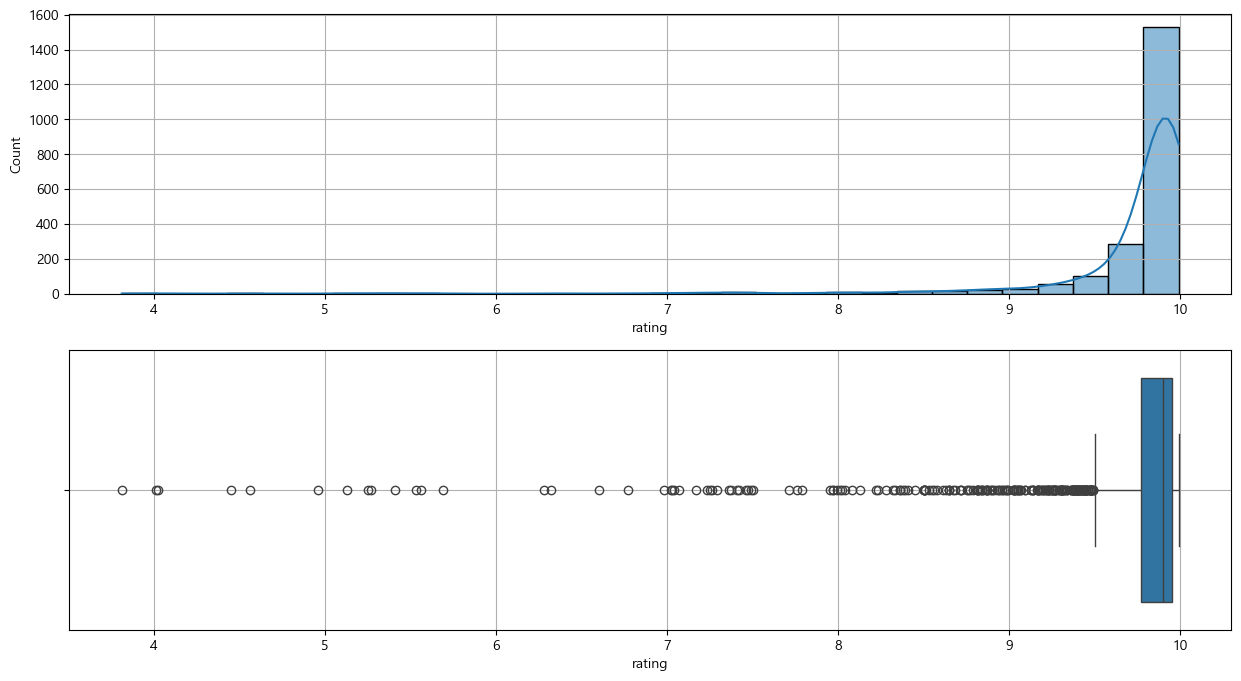

In [58]:
eda_1_n(naver,'rating')

1. 가설: 연재 완료 여부(completed)가 웹툰의 평점(rating)에 영향을 줄 것이다.
2. 장르(genre)가 평점(rating)에 영향을 줄 것이다.
3. 연령 제한(age)이 기다리면 무료 여부(free)에 영향을 줄 것이다.

#### 1. 연재 완료 여부(completed)가 웹툰의 평점에 영향을 줄 것이다.

In [61]:
naver.head()

,id,title,author,rating,completed,age,free,Major Category,Minor Category
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,9.13,True,전체연령가,True,스토리,로맨스
1,670144,가담항설,랑또,9.98,True,12세 이용가,True,스토리,판타지
2,732071,가령의 정체불명 이야기,가령,9.95,True,15세 이용가,True,옴니버스,드라마
3,703844,가비지타임,2사장,9.96,False,전체연령가,False,스토리,스포츠
4,785701,가상&RPG,주다현,9.91,False,12세 이용가,False,스토리,판타지


 <<<  completed   >>


,Class,Count,Prop
0,True,1406,0.669524
1,False,694,0.330476


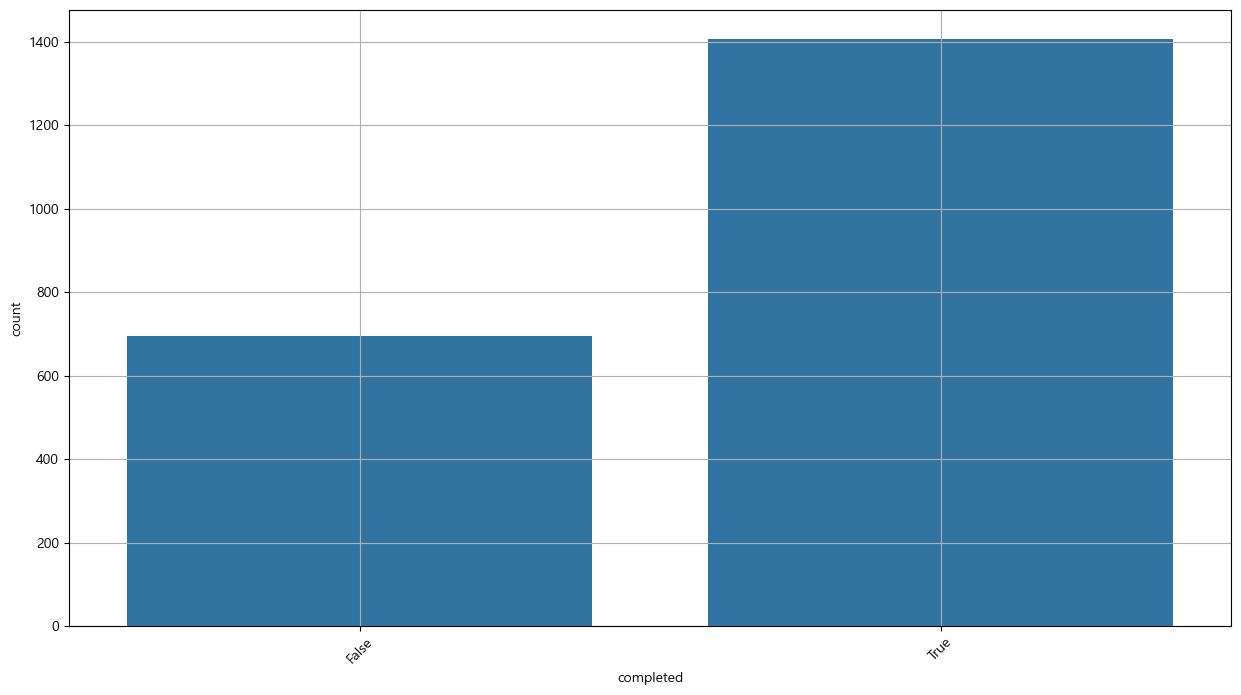

In [62]:
# completed 단변량 분석
eda_1_c(naver, 'completed')

TtestResult(statistic=-3.179727704622156, pvalue=0.0014956384389568497, df=2098.0)


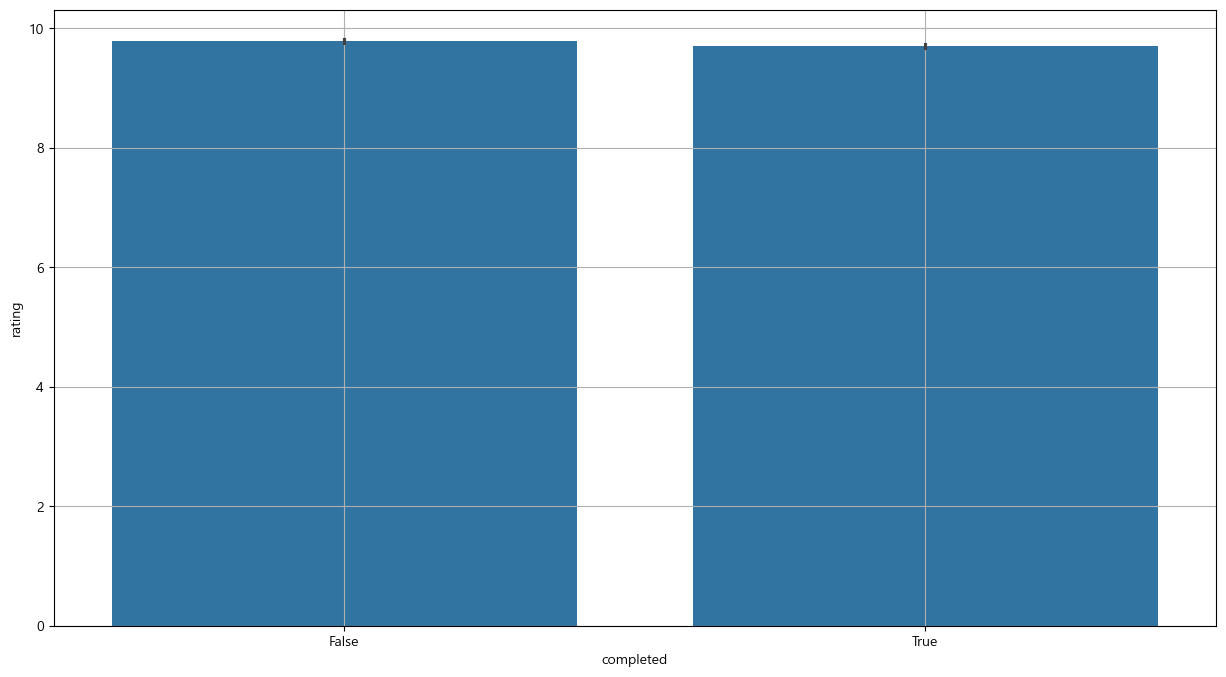

In [63]:
eda_2_cn(naver, 'completed', 'rating')

- 그래프 상으로는 유의미한 차이가 있어보인다.
- p_value=0.001로 유의미한 차이가 있다고 볼 수있다.

#### 2. 장르(genre)가 평점(rating)에 영향을 줄 것이다.

 <<<  Minor Category   >>


,Class,Count,Prop
0,로맨스,547,0.260476
1,드라마,438,0.208571
2,판타지,362,0.172381
3,스릴러,259,0.123333
4,액션,177,0.084286
5,개그,138,0.065714
6,일상,80,0.038095
7,무협/사극,43,0.020476
8,감성,33,0.015714
9,스포츠,23,0.010952


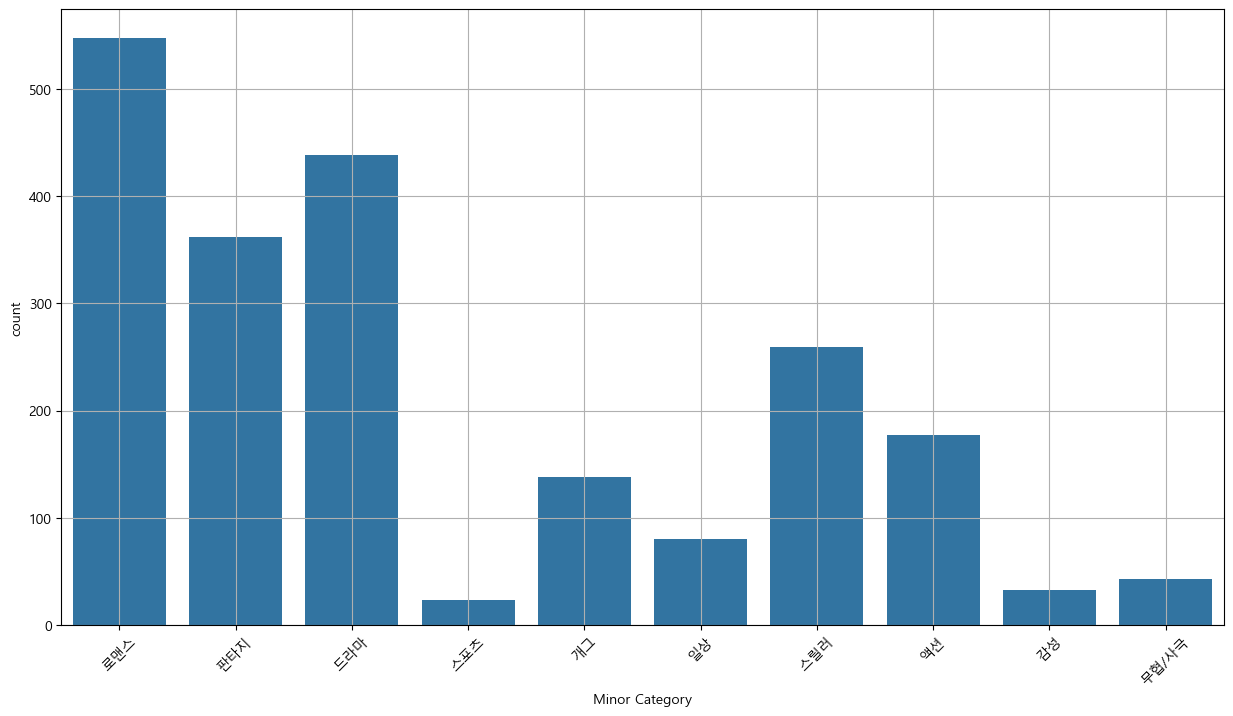

In [66]:
# completed 단변량 분석
eda_1_c(naver, 'Minor Category')

F_onewayResult(statistic=5.1743537856370105, pvalue=5.684627849167131e-07)


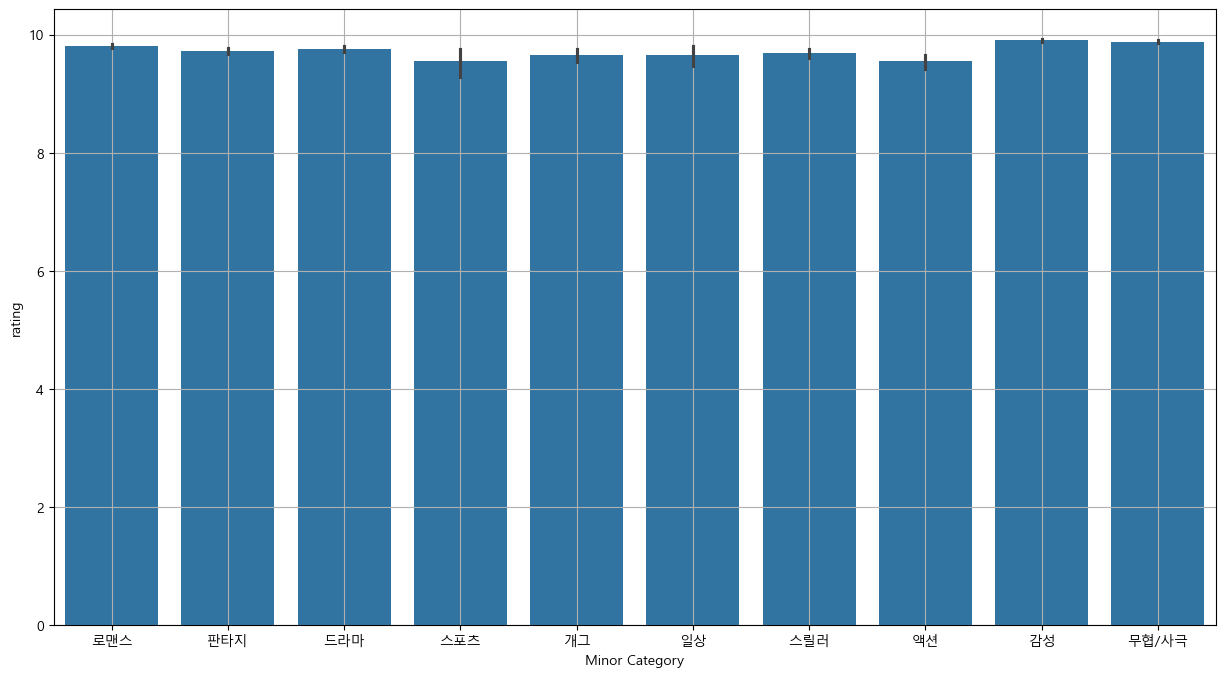

In [67]:
eda_2_cn(naver, 'Minor Category', 'rating')

- pvalue가 5.684627849167131e-07로 변수간 유의미한 차이가 있다.

#### 3. 연령 제한(age)이 기다리면 무료 여부(free)에 영향을 줄 것이다.

 <<<  free   >>


,Class,Count,Prop
0,False,1125,0.535714
1,True,975,0.464286


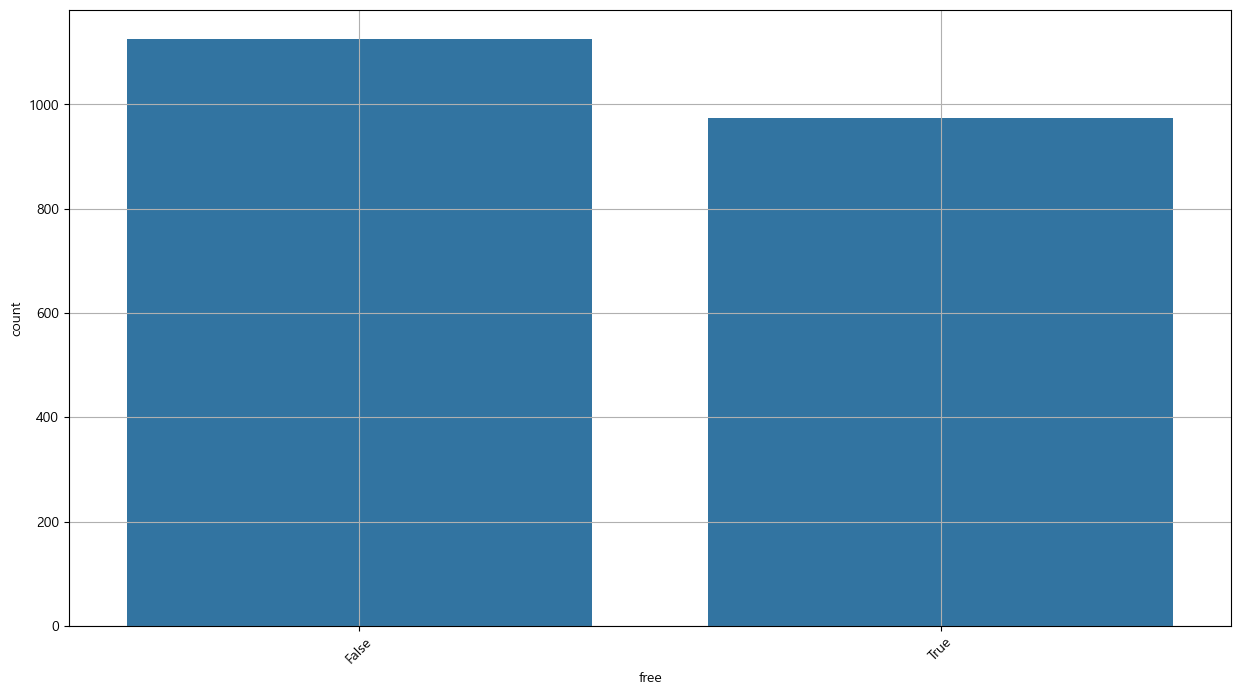

In [70]:
# free 단변량 분석
eda_1_c(naver, 'free')

 <<<  age   >>


,Class,Count,Prop
0,전체연령가,932,0.443810
1,15세 이용가,600,0.285714
2,12세 이용가,502,0.239048
3,18세 이용가,66,0.031429


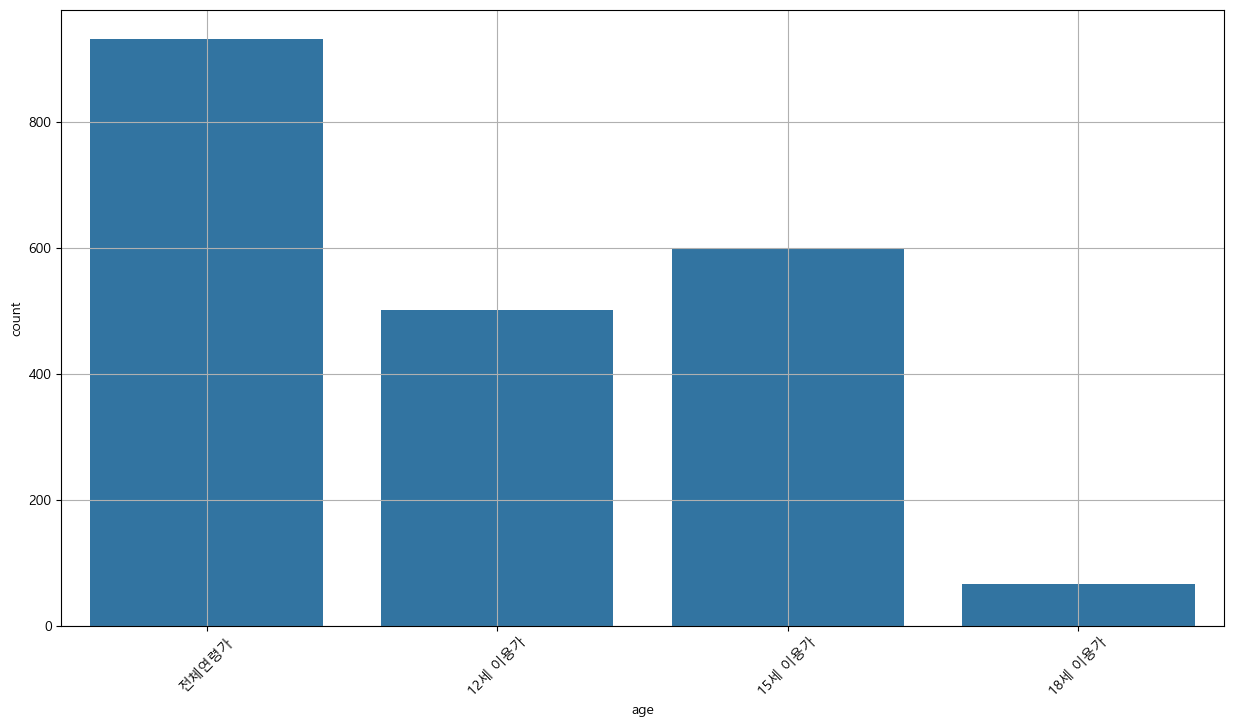

In [71]:
# age 단변량 분석
eda_1_c(naver, 'age')

0.4642857142857143


age,12세 이용가,15세 이용가,18세 이용가,전체연령가
free,,,,
False,294,339,26,466
True,208,261,40,466


age,12세 이용가,15세 이용가,18세 이용가,전체연령가
free,,,,
False,0.585657,0.565,0.393939,0.5
True,0.414343,0.435,0.606061,0.5


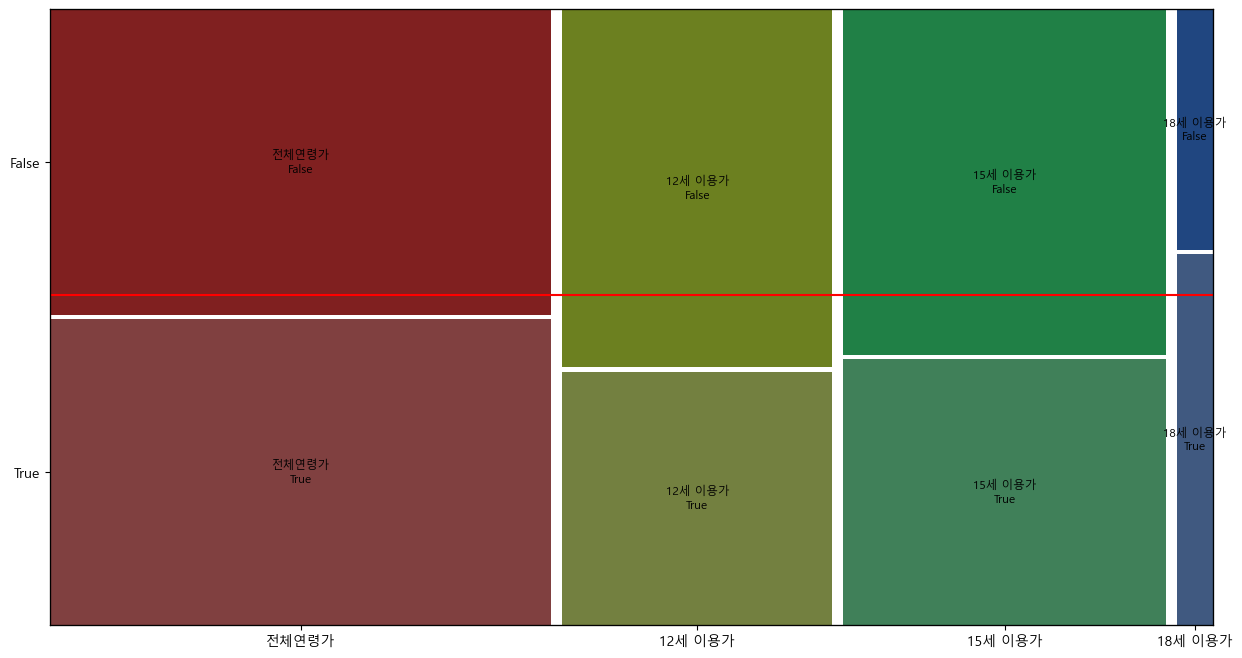

Chi2ContingencyResult(statistic=17.216317338261554, pvalue=0.0006379089040753458, dof=3, expected_freq=array([[268.92857143, 321.42857143,  35.35714286, 499.28571429],
       [233.07142857, 278.57142857,  30.64285714, 432.71428571]]))


In [72]:
eda_2_cc(naver,'free','age')

- 카이제곱 통계량이 17.2로 자유도의 2배 이상이고, p-value 또한 0.05 보다 작다
- 연령제한과 기다리면 무료 간에는 유의미한 차이가 있는 것으로 보인다.

### naver_challenge.csv 가설

1. 포텐업 선정 여부(potenup)가 평점(rating)에 영향을 줄 것이다.
2. 장르(genre)가 정식 연재 여부(serialize)에 영향을 줄 것이다.
3. 형식(format)이 정식 연재 여부(serialize)에 영향을 줄 것이다.

#### 1. 포텐업 선정 여부(potenup)가 평점(rating)에 영향을 줄 것이다.

In [77]:
naver_c.head()

,id,title,author,rating,genre,format,serial,potenup,genre_1,genre_2
0,779637,예수쟁이 다이어리,ahnc****,9.30,daily,에피소드,False,False,daily,NaN
1,748367,이래서 애들은,dksk****,9.89,"daily, comic",옴니버스,False,False,daily,comic
2,748498,나의 섭식장애 일기,vldk****,9.85,daily,에피소드,False,False,daily,NaN
3,683018,오늘의 후기,chae****,9.77,"daily, comic",에피소드,False,False,daily,comic
4,756652,제제와 함께,ls****,9.73,"daily, drama",에피소드,False,False,daily,drama


 <<<  potenup   >>


,Class,Count,Prop
0,False,3190,0.999373
1,True,2,0.000627


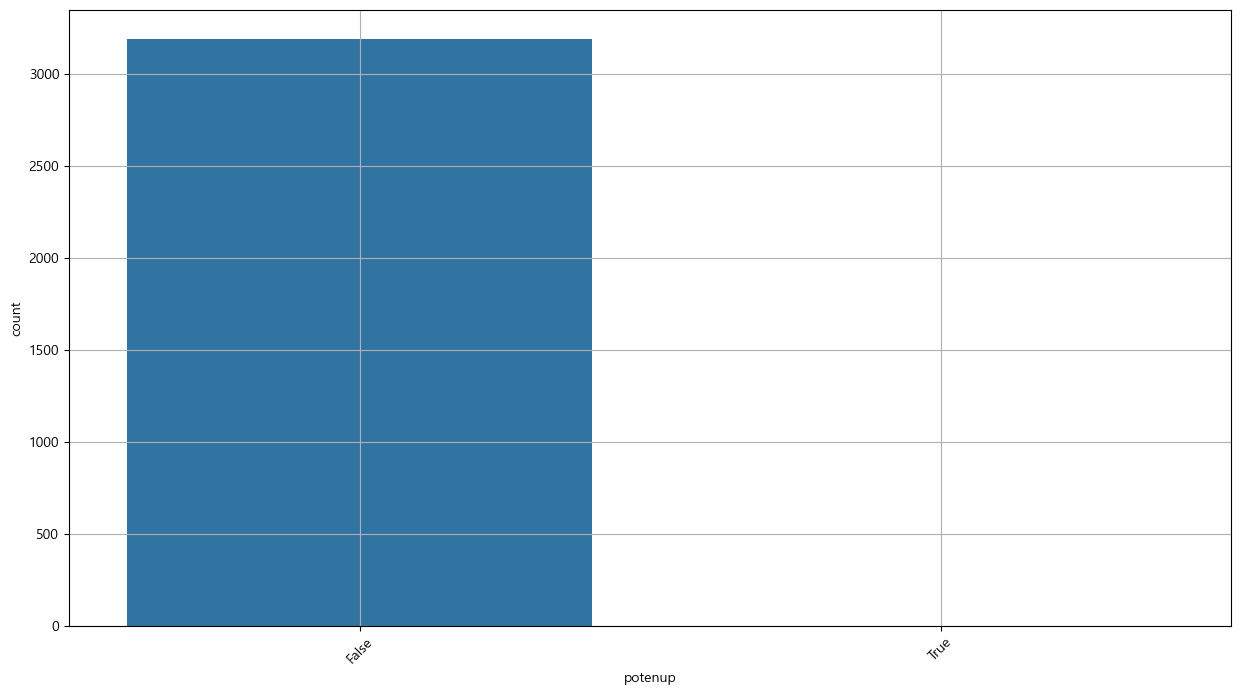

In [78]:
eda_1_c(naver_c,'potenup')

- ? 포텐업이 2개 밖에?

TtestResult(statistic=1.0006045814692723, pvalue=0.3170939070616404, df=3190.0)


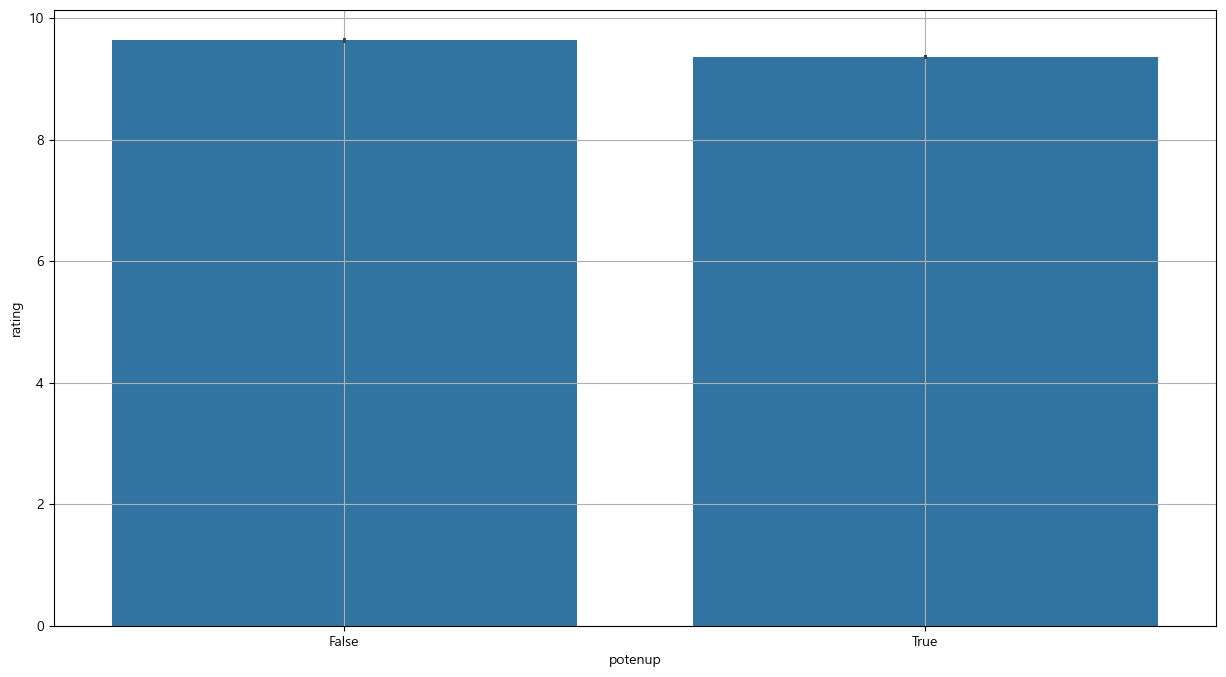

In [80]:
eda_2_cn(naver_c,'potenup','rating')

- 유효x

#### 2. 장르(genre)가 정식 연재 여부(serialize)에 영향을 줄 것이다.

##### 1) genre_1을 주장르로 가정

 <<<  genre_1   >>


,Class,Count,Prop
0,daily,985,0.308584
1,fantasy,920,0.288221
2,drama,532,0.166667
3,comic,372,0.116541
4,pure,151,0.047306
5,action,127,0.039787
6,thrill,54,0.016917
7,sensibility,33,0.010338
8,sports,10,0.003133
9,historical,8,0.002506


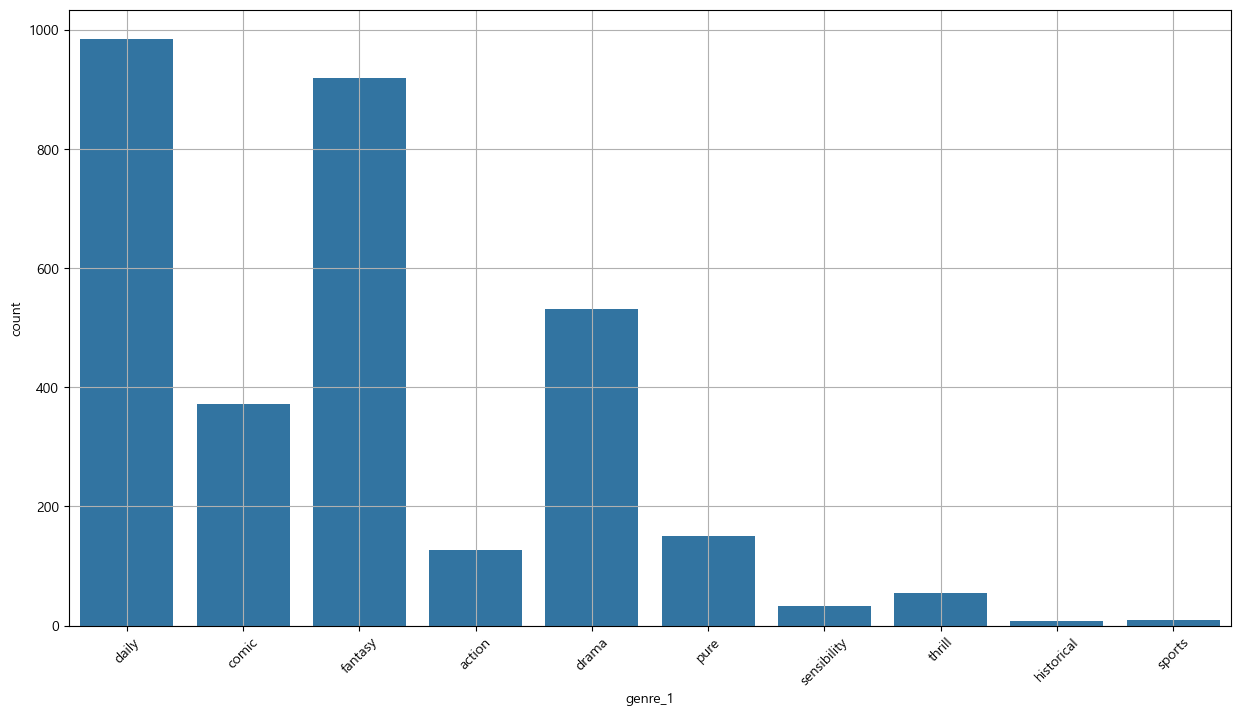

In [84]:
eda_1_c(naver_c,'genre_1')

0.06328320802005012


genre_1,action,comic,daily,drama,fantasy,historical,pure,sensibility,sports,thrill
serial,,,,,,,,,,
False,122,336,939,478,873,8,144,33,9,48
True,5,36,46,54,47,0,7,0,1,6


genre_1,action,comic,daily,drama,fantasy,historical,pure,sensibility,sports,thrill
serial,,,,,,,,,,
False,0.96063,0.903226,0.953299,0.898496,0.948913,1.0,0.953642,1.0,0.9,0.888889
True,0.03937,0.096774,0.046701,0.101504,0.051087,0.0,0.046358,0.0,0.1,0.111111


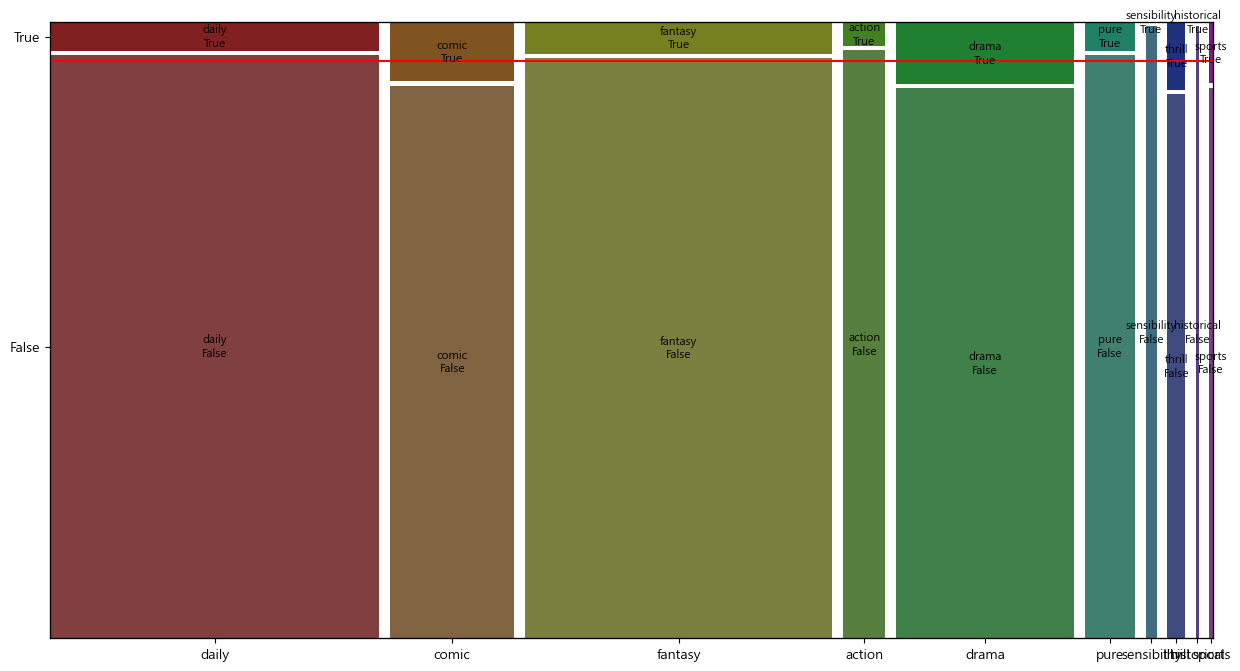

Chi2ContingencyResult(statistic=34.06291580702893, pvalue=8.70822823560916e-05, dof=9, expected_freq=array([[1.18963033e+02, 3.48458647e+02, 9.22666040e+02, 4.98333333e+02,
        8.61779449e+02, 7.49373434e+00, 1.41444236e+02, 3.09116541e+01,
        9.36716792e+00, 5.05827068e+01],
       [8.03696742e+00, 2.35413534e+01, 6.23339599e+01, 3.36666667e+01,
        5.82205514e+01, 5.06265664e-01, 9.55576441e+00, 2.08834586e+00,
        6.32832080e-01, 3.41729323e+00]]))


In [85]:
eda_2_cc(naver_c,'serial','genre_1')

- 카이제곱 통계량이 34.06으로 자유도의 2배 이상이고, p-value 또한 0.05 보다 작다
- 주 장르와 정식 연재 여부 간에는 유의미한 차이가 있는 것으로 보인다.

##### 2) genre로 장르 조합까지 확인

 <<<  genre   >>


,Class,Count,Prop
0,"daily, comic",326,0.102130
1,"fantasy, action",271,0.084900
2,daily,257,0.080514
3,"drama, pure",223,0.069862
4,"fantasy, drama",207,0.064850
5,"fantasy, pure",174,0.054511
6,"daily, sensibility",145,0.045426
7,"comic, fantasy",125,0.039160
8,fantasy,119,0.037281
9,"drama, sensibility",105,0.032895


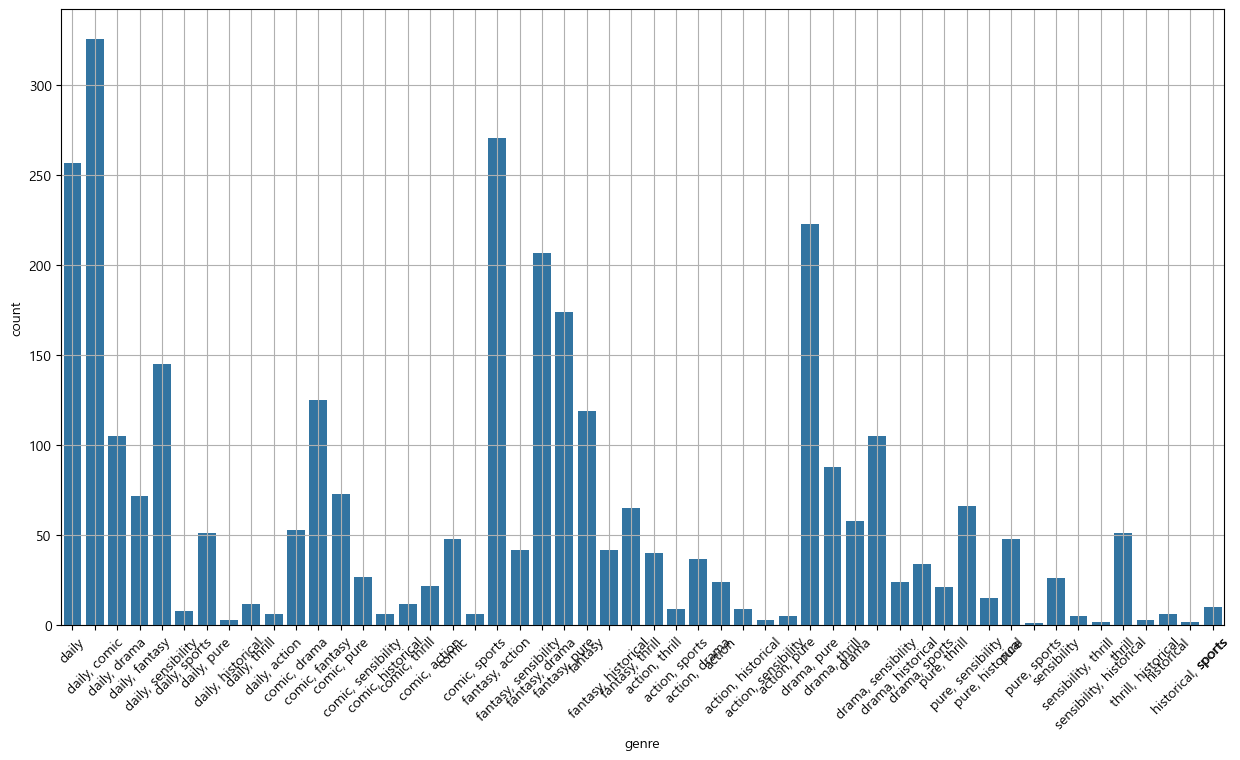

In [88]:
eda_1_c(naver_c,'genre')

0.06328320802005012


genre,action,"action, drama","action, historical","action, pure","action, sensibility","action, sports","action, thrill",comic,"comic, action","comic, drama",...,"pure, historical","pure, sensibility","pure, sports","pure, thrill",sensibility,"sensibility, historical","sensibility, thrill",sports,thrill,"thrill, historical"
serial,,,,,,,,,,,,,,,,,,,,,
False,24,36,8,5,3,9,37,39,21,45,...,15,63,1,20,26,2,5,9,45,3
True,0,1,1,0,0,0,3,9,1,8,...,0,3,0,1,0,0,0,1,6,0


genre,action,"action, drama","action, historical","action, pure","action, sensibility","action, sports","action, thrill",comic,"comic, action","comic, drama",...,"pure, historical","pure, sensibility","pure, sports","pure, thrill",sensibility,"sensibility, historical","sensibility, thrill",sports,thrill,"thrill, historical"
serial,,,,,,,,,,,,,,,,,,,,,
False,1.0,0.972973,0.888889,1.0,1.0,1.0,0.925,0.8125,0.954545,0.849057,...,1.0,0.954545,1.0,0.952381,1.0,1.0,1.0,0.9,0.882353,1.0
True,0.0,0.027027,0.111111,0.0,0.0,0.0,0.075,0.1875,0.045455,0.150943,...,0.0,0.045455,0.0,0.047619,0.0,0.0,0.0,0.1,0.117647,0.0


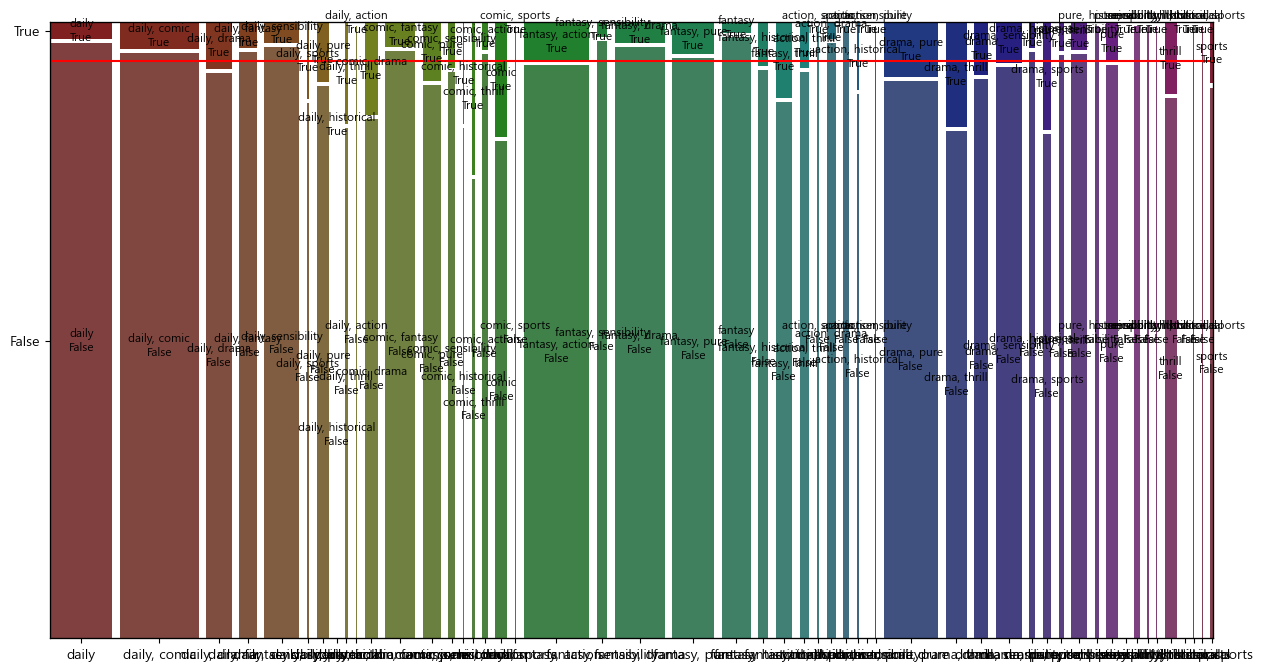

Chi2ContingencyResult(statistic=101.01887748708923, pvalue=3.817103208409436e-05, dof=51, expected_freq=array([[2.24812030e+01, 3.46585213e+01, 8.43045113e+00, 4.68358396e+00,
        2.81015038e+00, 8.43045113e+00, 3.74686717e+01, 4.49624060e+01,
        2.06077694e+01, 4.96459900e+01, 1.17089599e+02, 5.62030075e+00,
        6.83803258e+01, 2.52913534e+01, 5.62030075e+00, 1.12406015e+01,
        2.40736216e+02, 5.62030075e+00, 3.05369674e+02, 9.83552632e+01,
        6.74436090e+01, 2.81015038e+00, 4.77725564e+01, 1.35823935e+02,
        7.49373434e+00, 1.12406015e+01, 5.43295739e+01, 2.24812030e+01,
        2.08887845e+02, 9.83552632e+01, 3.18483709e+01, 8.24310777e+01,
        1.11469298e+02, 2.53850251e+02, 1.93900376e+02, 3.93421053e+01,
        1.62988722e+02, 3.93421053e+01, 6.08865915e+01, 5.62030075e+00,
        1.87343358e+00, 4.49624060e+01, 1.40507519e+01, 6.18233083e+01,
        9.36716792e-01, 1.96710526e+01, 2.43546366e+01, 1.87343358e+00,
        4.68358396e+00, 9.367167

In [89]:
eda_2_cc(naver_c,'serial','genre')

- 카이제곱 통계량이 101.01 로 자유도(51)의 2배에 가깝고, p-value 또한 0.05 보다 작다
- 장르와 정시연재여부 간에는 유의미한 차이가 있는 것으로 보인다.

#### 3. 형식(format)이 정식 연재 여부(serialize)에 영향을 줄 것이다.

 <<<  format   >>


,Class,Count,Prop
0,스토리,2069,0.648183
1,에피소드,852,0.266917
2,옴니버스,271,0.084900


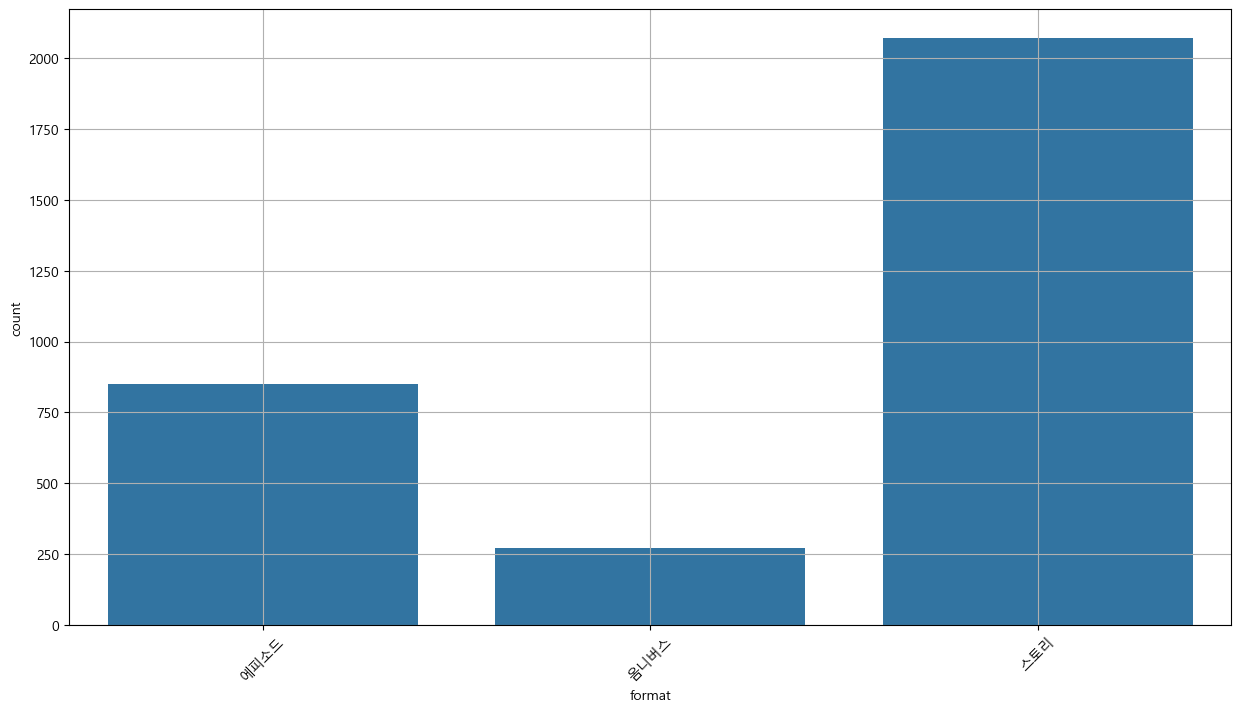

In [92]:
eda_1_c(naver_c,'format')

0.06328320802005012


format,스토리,에피소드,옴니버스
serial,,,
False,1916,819,255
True,153,33,16


format,스토리,에피소드,옴니버스
serial,,,
False,0.926051,0.961268,0.940959
True,0.073949,0.038732,0.059041


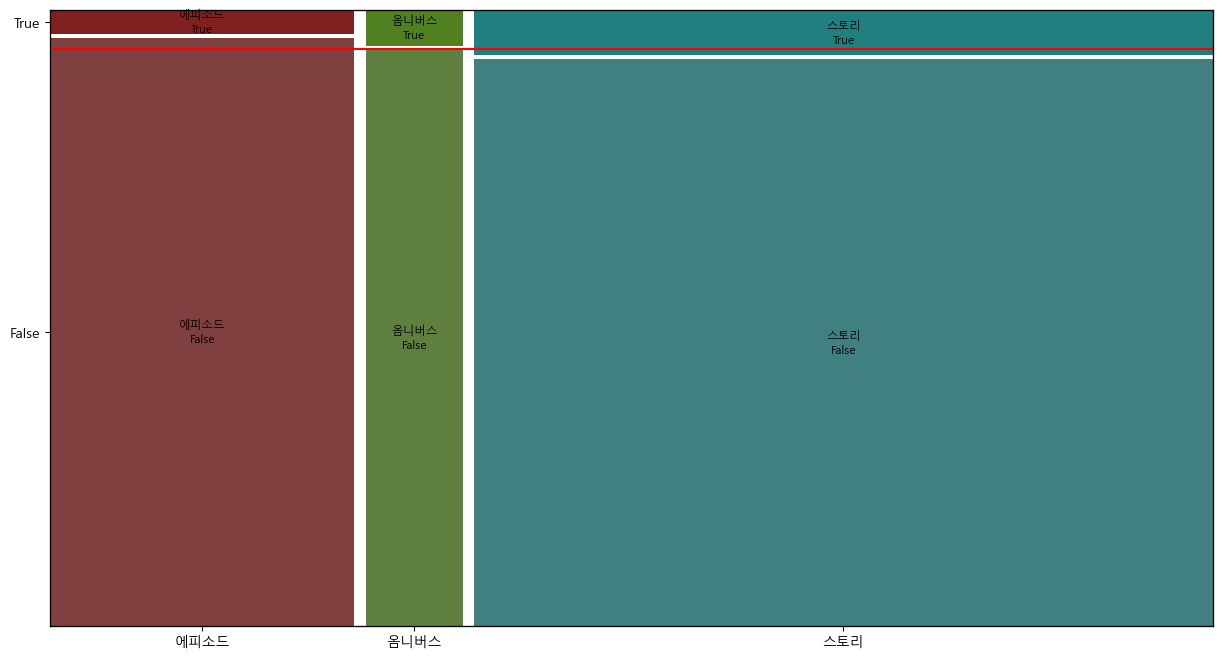

Chi2ContingencyResult(statistic=12.715783771637565, pvalue=0.0017330162598272704, dof=2, expected_freq=array([[1938.06704261,  798.08270677,  253.85025063],
       [ 130.93295739,   53.91729323,   17.14974937]]))


In [93]:
eda_2_cc(naver_c,'serial','format')

- 카이제곱 통계량이 12.71 로 자유도(2)의 2배 이상이고, p-value 또한 0.05 보다 작다
- 포맷과 정시연재여부 간에는 유의미한 차이가 있는 것으로 보인다.

### naver + naver_challange

1. 베스트 도전 웹툰의 평점(naver_challenge.csv)과 정식 연재 후 평점(naver.csv)이 변화할 것이다.

In [97]:
test_1 = naver_c.copy()

In [98]:
test_1.head()

,id,title,author,rating,genre,format,serial,potenup,genre_1,genre_2
0,779637,예수쟁이 다이어리,ahnc****,9.30,daily,에피소드,False,False,daily,NaN
1,748367,이래서 애들은,dksk****,9.89,"daily, comic",옴니버스,False,False,daily,comic
2,748498,나의 섭식장애 일기,vldk****,9.85,daily,에피소드,False,False,daily,NaN
3,683018,오늘의 후기,chae****,9.77,"daily, comic",에피소드,False,False,daily,comic
4,756652,제제와 함께,ls****,9.73,"daily, drama",에피소드,False,False,daily,drama


In [99]:
test_1.rename(columns={'rating':'rating_c'}, inplace=True)

In [100]:
test_1['genre_1'].value_counts()

genre_1
daily          985
fantasy        920
drama          532
comic          372
pure           151
action         127
thrill          54
sensibility     33
sports          10
historical       8
Name: count, dtype: int64

In [101]:
# k = {'daily':'일상','fantasy':'판타지','drama':'드라마','comic':'개그','pure':'로맨스','action':'액션','thrill':'스릴러','sensibility':'감성','sports':'스포츠','historical':'무협/사극'}

# test_1['genre'] = test_1['genre'].replace(k)
# test_1['genre_1'] = test_1['genre_1'].replace(k)
# test_1['genre_2'] = test_1['genre_2'].replace(k)

In [102]:
# test_1['genre_k'] = test_1[['genre_1', 'genre_2']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [103]:
# test_1['genre_k'].value_counts()

In [104]:
test_1

,id,title,author,rating_c,genre,format,serial,potenup,genre_1,genre_2
0,779637,예수쟁이 다이어리,ahnc****,9.30,daily,에피소드,False,False,daily,NaN
1,748367,이래서 애들은,dksk****,9.89,"daily, comic",옴니버스,False,False,daily,comic
2,748498,나의 섭식장애 일기,vldk****,9.85,daily,에피소드,False,False,daily,NaN
3,683018,오늘의 후기,chae****,9.77,"daily, comic",에피소드,False,False,daily,comic
4,756652,제제와 함께,ls****,9.73,"daily, drama",에피소드,False,False,daily,drama
...,...,...,...,...,...,...,...,...,...,...
3187,577683,GO! 신나고,answ****,9.59,sports,스토리,False,False,sports,NaN
3188,620971,모두의 추억,rayk****,9.79,sports,스토리,False,False,sports,NaN
3189,571253,튄공,no****,9.79,sports,스토리,False,False,sports,NaN
3190,341379,샌프란시스코 화랑관,uraj****,9.83,sports,옴니버스,True,False,sports,NaN


In [105]:
test_2 = naver.copy()

In [106]:
test_2['Minor Category'].value_counts()

Minor Category
로맨스      547
드라마      438
판타지      362
스릴러      259
액션       177
개그       138
일상        80
무협/사극     43
감성        33
스포츠       23
Name: count, dtype: int64

In [107]:
test_2.head()

,id,title,author,rating,completed,age,free,Major Category,Minor Category
0,756056,가난을 등에 업은 소녀,B급달궁 / 오은지,9.13,True,전체연령가,True,스토리,로맨스
1,670144,가담항설,랑또,9.98,True,12세 이용가,True,스토리,판타지
2,732071,가령의 정체불명 이야기,가령,9.95,True,15세 이용가,True,옴니버스,드라마
3,703844,가비지타임,2사장,9.96,False,전체연령가,False,스토리,스포츠
4,785701,가상&RPG,주다현,9.91,False,12세 이용가,False,스토리,판타지


In [108]:
test_1 = test_1[['title','rating_c']]
test_2 = test_2[['title','rating']]

In [109]:
test_3 = pd.merge(test_2, test_1, how='inner', on='title' )
test_3

,title,rating,rating_c
0,가상&RPG,9.91,9.88
1,가타부타타,9.95,9.85
2,갓!김치,7.42,8.15
3,갓도령스,9.96,9.88
4,걸어서 30분,9.97,9.90
...,...,...,...
179,1인용 기분,9.97,9.87
180,203호 저승사자,9.91,9.75
181,4층복도끝천국,9.77,9.85
182,5kg을 위하여,9.57,9.89


상관계수 : 0.26766972348327567, P-value : 0.00023937931201472082


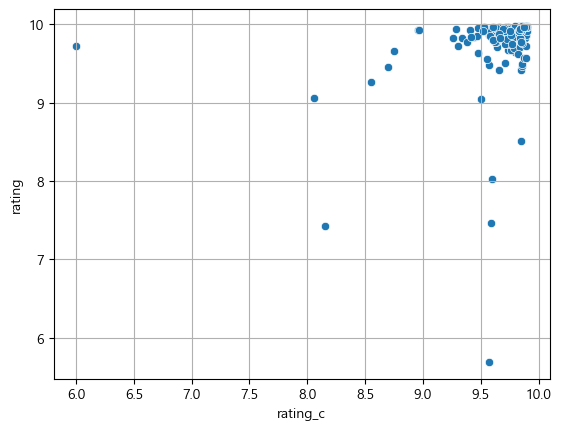

In [110]:
eda_2_nn(test_3,'rating_c','rating')

- 상관계수 0.267로 약한 양의 상관관계를 가지며, p-value는 0.0002로 유의미한 차이를 가진다.

# 총정리

## naver.csv
- 연재 완료 여부 / 평점 유의미한 차이 O
- 장르 / 평점 유의미한 차이 O
- 연령제한(age) / 기다리면 무료 여부 유의미한 차이 O

## naver_challenge.csv
- 포텐업 선정 여부 / 평점 유의미한 차이 X
- 장르 / 정식 연재 여부 유의미 차이 O
- 형식 / 정식 연재 여부 유의미 차이 O

## naver.csv + naver_challenge.csv
- 베스트 도전 웹툰의 평점(naver_challenge.csv)과 정식 연재 후 평점(naver.csv) 차이 유의미 O